In [1]:
# Load Library

packages <- c("dplyr", "haven","ggplot2","MASS", "randomForest", "caret", "ranger", "parallel")

install_if_missing <- function(pkg) {
  if (!requireNamespace(pkg, quietly = TRUE)) {
    install.packages(pkg)
  }
  library(pkg, character.only = TRUE)
}

lapply(packages, install_if_missing)

select <- dplyr::select


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine


Loading required package: lattice


Attaching package: 'ranger'


The following object is masked from 'package:randomForest':

    importance




[[1]]
[1] "dplyr"     "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "haven"     "dplyr"     "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "ggplot2"   "haven"     "dplyr"     "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "MASS"      "ggplot2"   "haven"     "dplyr"     "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "randomForest" "MASS"         "ggplot2"      "haven"        "dplyr"       
 [6] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[11] "methods"      "base"        

[[6]]
 [1] "caret"        "lattice"      "randomForest" "MASS"         "ggplot2"     
 [6] "haven"        "dplyr"        "stats"        "graphics"     "grDevices"   
[11] "utils"        "datasets"     "methods"      "base"        

[[7]]
 [1] "ranger"       "caret"        "lattice"      "randomForest" "MASS"        
 [6] "ggplot2"      "haven"        "dplyr"        "stats"        "graphics"    
[11] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[8]]
 [1] "parallel"     "ranger"       "caret"        "lattice"      "randomForest"
 [6] "MASS"         "ggplot2"      "haven"        "dplyr"        "stats"       
[11] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[16] "base"

In [6]:
#Filter the BMI<25

In [7]:
df1 <- read.csv("Data/merge_df_cln.csv") %>% 
  filter(cc_bmi == "<25") %>% 
  select("bp_sys_mean","DRXTPROT", "DRXTCARB", "DRXTTFAT", "DRXTSFAT", "DRXTMFAT", "DRXTPFAT", "DRXTCHOL", "DRXTFIBE", 
"DRXTVB6", "DRXTVB12", "DRXTFOLA", "DRXTVC", "DRXTCALC", "DRXTPHOS", "DRXTMAGN", "DRXTIRON", 
"DRXTZINC", "DRXTCOPP", "DRDTSODI", "DRXTPOTA", "DRXTSELE", "DRXTCAFF", "DRXTTHEO", "DRXTALCO", 
 "DRXTS040", "DRXTS060", "DRXTS080", "DRXTS100", "DRXTS120", "DRXTS140", "DRXTS160", 
"DRXTS180", "DRXTM161", "DRXTM181", "DRXTM201", "DRXTM221", "DRXTP182", "DRXTP183", "DRXTP184", 
"DRXTP204", "DRXTP205", "DRXTP225", "DRXTP226", "DRD320GW"
) 
head(df1)

,bp_sys_mean,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTSFAT,DRXTMFAT,DRXTPFAT,DRXTCHOL,DRXTFIBE,DRXTVB6,⋯,DRXTM201,DRXTM221,DRXTP182,DRXTP183,DRXTP184,DRXTP204,DRXTP205,DRXTP225,DRXTP226,DRD320GW
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,100.6667,123.16,350.37,71.95,24.34,26.48,11.94,313.95,36.99,2.90,⋯,0.09,0.02,10.07,1.14,0,0.26,0.00,0.01,0.02,0.00
2,114.6667,24.63,202.11,25.15,7.78,7.84,7.15,38.45,6.24,0.97,⋯,0.05,0.01,6.41,0.69,0,0.03,0.00,0.00,0.00,1711.00
3,147.3333,39.62,112.24,33.87,18.61,10.18,2.37,124.95,16.36,0.77,⋯,0.00,0.00,1.86,0.49,0,0.02,0.00,0.00,0.00,236.00
4,94.0000,99.84,334.43,136.90,49.38,55.83,23.51,292.98,14.21,1.69,⋯,0.24,0.01,21.10,2.10,0,0.13,0.01,0.02,0.04,1652.00
5,128.0000,20.03,120.16,32.94,16.95,10.38,3.71,96.73,3.48,0.21,⋯,0.03,0.00,3.08,0.53,0,0.00,0.00,0.00,0.00,663.75
6,110.6667,71.13,279.65,133.93,35.73,52.33,37.34,293.94,18.41,1.90,⋯,0.24,0.00,32.66,4.27,0,0.18,0.01,0.03,0.06,1622.50


In [15]:
# Calculate the R_squred

In [16]:
options(scipen = 999)
cordf1 <- data.frame(Variable = setdiff(names(df1), "bp_sys_mean"))
cordf1$r_squared <- sapply(cordf1$Variable,
                          function(var) 

cor(df1[[var]],df1$bp_sys_mean)^2)

cordf1 <- cordf1[order(-cordf1$r_squared), ]

print(cordf1)

   Variable     r_squared
2  DRXTCARB 0.00910158833
3  DRXTTFAT 0.00737035084
5  DRXTMFAT 0.00718538263
31 DRXTS160 0.00709354287
4  DRXTSFAT 0.00703898941
34 DRXTM181 0.00686625396
13 DRXTCALC 0.00685780791
19 DRDTSODI 0.00672854238
32 DRXTS180 0.00648933311
14 DRXTPHOS 0.00633526695
1  DRXTPROT 0.00575091472
30 DRXTS140 0.00554463266
25 DRXTS040 0.00494643088
44 DRD320GW 0.00447074330
37 DRXTP182 0.00432107794
33 DRXTM161 0.00423273915
6  DRXTPFAT 0.00403281967
28 DRXTS100 0.00333260642
26 DRXTS060 0.00312955454
17 DRXTZINC 0.00278606802
21 DRXTSELE 0.00278286456
15 DRXTMAGN 0.00241113941
27 DRXTS080 0.00237413029
16 DRXTIRON 0.00218036868
11 DRXTFOLA 0.00199145670
23 DRXTTHEO 0.00180236289
38 DRXTP183 0.00147132750
24 DRXTALCO 0.00118289724
9   DRXTVB6 0.00114378880
35 DRXTM201 0.00099911878
20 DRXTPOTA 0.00094606932
18 DRXTCOPP 0.00073643298
8  DRXTFIBE 0.00062395547
29 DRXTS120 0.00062358531
7  DRXTCHOL 0.00050171473
12   DRXTVC 0.00046054116
40 DRXTP204 0.00025537308
43 DRXTP226 

In [17]:
# Use forward selection method

In [18]:
fit_model_df1 <- function(response, predictors, data) {
  models <- list()
  formula_str <- response 
  for (i in seq_along(predictors)) {
    formula_str <- paste(formula_str, "+", predictors[i]) 
    models[[i]] <- lm(as.formula(paste("bp_sys_mean ~", paste(predictors[1:i], collapse = " + "))), data = data)
  }
  
  return(models)
}
sort_vars <- cordf1$Variable
df1_models <- fit_model_df1(response = "bp_sys_mean", predictors = sort_vars, data = df1)


In [19]:
# Use AIC to select the model

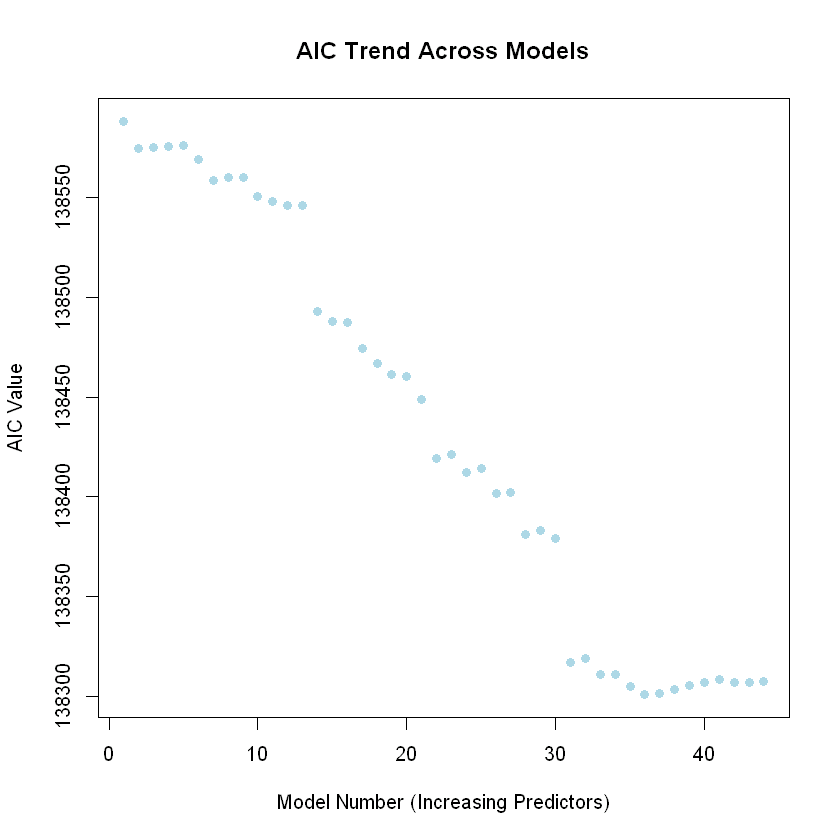

In [20]:
df1_models_aic <- sapply(df1_models, AIC)
model_nums <- seq_along(df1_models_aic)

plot(model_nums, df1_models_aic, pch = 19, col = "lightblue",
     xlab = "Model Number (Increasing Predictors)", 
     ylab = "AIC Value",
     main = "AIC Trend Across Models")

In [21]:
# Stepwise Model 

In [25]:
library(MASS)
full_model <- lm(bp_sys_mean ~ ., data = df1)
best_model <- stepAIC(full_model, direction = "both", trace = FALSE)  

In [28]:
sqrt(mean(resid(best_model)^2))

[1] 19.22983

In [11]:
# define a function that calculate summary statistics for numerical variables and levels for characteristics ones
# returns a list `statistic` that contains the results and
# returns a modified data set that converted the characteristics to factors
calculate_stats <- function(data) {
  # Load necessary packages
  if (!requireNamespace("dplyr", quietly = TRUE)) install.packages("dplyr")
  if (!requireNamespace("modeest", quietly = TRUE)) install.packages("modeest")

  library(dplyr)
  library(modeest)

  # Initialize an empty list to store results
  results <- list()
  
  # Iterate through each column
  for (col_name in colnames(data)) {
    column <- data[[col_name]]
    
    if (is.numeric(column)) {
      # Calculate mean, median, mode, and standard deviation
      mean_value <- mean(column)
      median_value <- median(column)
      min_value <- min(column)
      max_value <- max(column)
      #mode_value <- as.numeric(mlv(na.omit(column), method = "mfv"))
      sd_value <- sd(column)
      
      # Store results in a sublist
      results[[col_name]] <- list(
        type = "numeric",
        mean = mean_value,
        median = median_value,
        minimum = min_value,
          maximum = max_value,
        #mode = mode_value,
        std_dev = sd_value
      )
      
    } else {
      # Convert character columns to factors
      data[[col_name]] <- as.factor(column)
      
      # Calculate frequency table for categorical variables
      freq_table <- table(data[[col_name]])
      
      # Store results in a sublist
      results[[col_name]] <- list(
        type = "categorical",
        frequencies = as.list(freq_table)
      )
    }
  }
  
  # Return both the computed statistics and the modified dataset
  return(list(statistics = results, modified_data = data))
}

# Maching Learning

In [71]:
df1 <- read.csv("Data/merge_df_cln.csv")
df1 <- df1 %>% 
        mutate(hyper = ifelse((bp_sys_mean >= 140 | bp_dia_mean >= 90), 1 , 0)) %>% 
        filter(htn_aware == "No") %>% #filter with Aware
        dplyr::select(-"X", -"bp_sys_mean", -"svy_id", -"bp_dia_mean", -"htn_aware")

colnames(df1)
# df1$hyper <- as.factor(df1$hyper)
# summary(df1$hyper)

[1] "svy_year"        "demo_age_cat"    "demo_race"       "demo_race_black"
 [5] "demo_age_years"  "demo_pregnant"   "demo_gender"     "cc_bmi"         
 [9] "DRXTPROT"        "DRXTCARB"        "DRXTTFAT"        "DRXTSFAT"       
[13] "DRXTMFAT"        "DRXTPFAT"        "DRXTCHOL"        "DRXTFIBE"       
[17] "DRXTVB6"         "DRXTVB12"        "DRXTFOLA"        "DRXTVC"         
[21] "DRXTCALC"        "DRXTPHOS"        "DRXTMAGN"        "DRXTIRON"       
[25] "DRXTZINC"        "DRXTCOPP"        "DRDTSODI"        "DRXTPOTA"       
[29] "DRXTSELE"        "DRXTCAFF"        "DRXTTHEO"        "DRXTALCO"       
[33] "DRXTMOIS"        "DRXTS040"        "DRXTS060"        "DRXTS080"       
[37] "DRXTS100"        "DRXTS120"        "DRXTS140"        "DRXTS160"       
[41] "DRXTS180"        "DRXTM161"        "DRXTM181"        "DRXTM201"       
[45] "DRXTM221"        "DRXTP182"        "DRXTP183"        "DRXTP184"       
[49] "DRXTP204"        "DRXTP205"        "DRXTP225"        "DRXTP226"       
[53] "DRD320GW"        "hyper"

## Random Forest

### Desrease size of majority

In [73]:
table(df1$hyper)

# Separate majority and minority classes
df1_majority <- df1 %>% filter(hyper == 0)
df1_minority <- df1 %>% filter(hyper == 1)

set.seed(42)
# Oversample minority class (duplicate existing data)
df1_majority_oversampled <- df1_majority %>% sample_n(nrow(df1_minority), replace = F)

# Combine balanced dataset
df1_balanced_decrease <- bind_rows(df1_minority, df1_majority_oversampled)

# Check new class distribution
table(df1_balanced_decrease$hyper)


    0     1 
29845  3680 


   0    1 
3680 3680 

In [64]:
# Change here for different resample method
df <- df1_balanced_decrease


# Split into training (70%) and testing (30%) sets
set.seed(42)
train_index <- createDataPartition(df$hyper, p = 0.7, list = FALSE)
train_data <- df[train_index, ]
test_data <- df[-train_index, ]

train_data$hyper <- as.factor(train_data$hyper)
test_data$hyper <- as.factor(test_data$hyper)

In [65]:
# Check available CPU cores
num_cores <- detectCores()
print(paste("Using", num_cores, "cores"))

# Train Random Forest classification model with multi-threading
rf_model <- ranger(hyper ~ ., data = train_data, 
                   num.trees = 500, 
                   mtry = sqrt(ncol(train_data) - 1), 
                   importance = "impurity",
                   probability = TRUE,  # Enables probability prediction
                   num.threads = num_cores)

# Predict class probabilities on the test set
predictions <- predict(rf_model, test_data)$predictions

# Convert probabilities to class labels
predicted_class <- ifelse(predictions[,2] > 0.5, "1", "0")  # Threshold at 0.5
predicted_class <- factor(predicted_class, levels = levels(test_data$hyper))

# Model Evaluation
conf_matrix <- confusionMatrix(predicted_class, test_data$hyper)

# Print Accuracy, Sensitivity, Specificity
print(conf_matrix)

# Variable Importance Plot
importance_values <- rf_model$variable.importance
sort(importance_values, decreasing = T)

[1] "Using 32 cores"
Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 754 253
         1 350 851
                                          
               Accuracy : 0.7269          
                 95% CI : (0.7078, 0.7454)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4538          
                                          
 Mcnemar's Test P-Value : 9.252e-05       
                                          
            Sensitivity : 0.6830          
            Specificity : 0.7708          
         Pos Pred Value : 0.7488          
         Neg Pred Value : 0.7086          
             Prevalence : 0.5000          
         Detection Rate : 0.3415          
   Detection Prevalence : 0.4561          
      Balanced Accuracy : 0.7269          
                                          
       'Positive' Class : 0               
         

demo_age_years    demo_age_cat        DRXTMOIS        DRXTCARB        DRXTCALC 
     351.108904      240.962979       49.696176       43.719252       39.300271 
         DRXTVC        DRDTSODI        DRXTCAFF         DRXTVB6        DRXTPOTA 
      39.223848       38.839815       38.618285       38.537601       38.515220 
       DRXTFOLA        DRXTM201        DRXTCHOL        DRXTVB12        DRXTPROT 
      38.267965       38.192021       37.378188       37.225468       36.854727 
       DRXTS120        DRXTP204        DRXTIRON        DRXTSELE        DRXTZINC 
      36.662841       36.598173       36.270201       36.147135       36.105218 
       DRXTFIBE        DRXTP183        DRXTCOPP        DRXTPHOS        DRXTM161 
      35.723475       35.480631       35.416426       35.333891       35.043836 
       DRXTP182        DRXTM181        DRD320GW        DRXTPFAT        DRXTS140 
      35.005980       34.804971       34.663185       34.545867       34.258294 
       DRXTMAGN        DRXTMFAT          cc_bmi        DRXTS180        DRXTTFAT 
      34.040644       33.825261       33.200892       32.975236       32.927762 
       DRXTS080        DRXTS160        DRXTS040        DRXTSFAT        DRXTS100 
      32.707109       32.230404       31.736682       31.581750       31.065319 
       DRXTS060        DRXTM221        DRXTP226        DRXTP225        DRXTP205 
      29.292366       28.672196       26.963092       25.802190       24.353936 
       DRXTTHEO        svy_year        DRXTALCO     demo_gender        DRXTP184 
      23.466477       22.300750       20.996893       17.276316       15.741951 
      demo_race demo_race_black   demo_pregnant 
      12.744057        8.226591        0.000000

### Increase size of minority (Bootstrap)

In [39]:
table(df1$hyper)

# Separate majority and minority classes
df1_majority <- df1 %>% filter(hyper == 0)
df1_minority <- df1 %>% filter(hyper == 1)

set.seed(24)
# Oversample minority class (duplicate existing data)
df1_minority_oversampled <- df1_minority %>% sample_n(nrow(df1_majority), replace = T)

# Combine balanced dataset
df1_balanced_bootstrap <- bind_rows(df1_majority, df1_minority_oversampled)

# Check new class distribution
table(df1_balanced_bootstrap$hyper)


    0     1 
29845  3680 


    0     1 
29845 29845 

In [40]:
# Change here for different resample method
df <- df1_balanced_bootstrap


# Split into training (70%) and testing (30%) sets
set.seed(42)
train_index <- createDataPartition(df$hyper, p = 0.7, list = FALSE)
train_data <- df[train_index, ]
test_data <- df[-train_index, ]

train_data$hyper <- as.factor(train_data$hyper)
test_data$hyper <- as.factor(test_data$hyper)

In [41]:
# Check available CPU cores
num_cores <- detectCores()
print(paste("Using", num_cores, "cores"))

# Train Random Forest classification model with multi-threading
rf_model <- ranger(hyper ~ ., data = train_data, 
                   num.trees = 500, 
                   mtry = sqrt(ncol(train_data) - 1), 
                   importance = "impurity",
                   probability = TRUE,  # Enables probability prediction
                   num.threads = num_cores)

# Predict class probabilities on the test set
predictions <- predict(rf_model, test_data)$predictions

# Convert probabilities to class labels
predicted_class <- ifelse(predictions[,2] > 0.5, "1", "0")  # Threshold at 0.5
predicted_class <- factor(predicted_class, levels = levels(test_data$hyper))

# Model Evaluation
conf_matrix <- confusionMatrix(predicted_class, test_data$hyper)

# Print Accuracy, Sensitivity, Specificity
print(conf_matrix)

# Variable Importance Plot
importance_values <- rf_model$variable.importance
sort(importance_values, decreasing = T)

[1] "Using 32 cores"
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5777   19
         1  192 5950
                                          
               Accuracy : 0.9823          
                 95% CI : (0.9798, 0.9846)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9647          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9678          
            Specificity : 0.9968          
         Pos Pred Value : 0.9967          
         Neg Pred Value : 0.9687          
             Prevalence : 0.5000          
         Detection Rate : 0.4839          
   Detection Prevalence : 0.4855          
      Balanced Accuracy : 0.9823          
                                          
       'Positive' Class : 0               
   

demo_age_years    demo_age_cat        DRXTMOIS        DRXTCARB        DRDTSODI 
      3360.9946       2366.7521        521.7803        462.8543        436.2497 
         DRXTVC        DRXTCAFF        DRXTM201        DRXTFOLA         DRXTVB6 
       425.6430        420.4418        419.1538        418.2492        410.9722 
       DRXTIRON        DRXTSELE        DRXTM161        DRXTCALC        DRXTVB12 
       404.4619        401.8032        398.3815        396.3730        395.8736 
       DRXTCOPP        DRXTFIBE        DRXTCHOL        DRXTPOTA        DRXTPROT 
       394.6566        391.7398        391.4931        390.8020        390.0906 
       DRXTP183        DRD320GW        DRXTZINC        DRXTP204        DRXTMAGN 
       388.7217        387.1669        385.2052        384.5863        376.6476 
       DRXTS120          cc_bmi        DRXTPHOS        DRXTP182        DRXTM181 
       372.3564        371.5824        371.5417        367.0030        359.1089 
       DRXTPFAT        DRXTS180        DRXTMFAT        DRXTS140        DRXTS040 
       358.4230        350.0913        346.2940        337.7077        335.9654 
       DRXTTFAT        DRXTS080        DRXTS160        DRXTS100        DRXTSFAT 
       334.0258        332.2106        329.4447        323.4145        314.9874 
       DRXTS060        DRXTM221        DRXTP226        DRXTP225        DRXTP205 
       309.6643        298.6327        291.5764        278.2607        270.4904 
       DRXTALCO        DRXTTHEO        svy_year        DRXTP184     demo_gender 
       265.6462        252.5937        238.4051        177.4844        173.3414 
      demo_race demo_race_black   demo_pregnant 
       138.7429        112.8859          0.0000

### Hybrid

In [74]:
# Step 1: Reduce the majority class (Under-sampling)
df1_majority <- df1 %>% filter(hyper == 0) %>% sample_n(nrow(df1_minority) * 1.5, replace = FALSE)

# Step 2: Increase the minority class (Over-sampling)
df1_minority_oversampled <- df1_minority %>% sample_n(nrow(df1_majority), replace = TRUE)

# Combine both
df1_balanced_hybrid <- bind_rows(df1_majority, df1_minority_oversampled)

# Check new class distribution
table(df1_balanced_hybrid$hyper)



   0    1 
5520 5520 

In [75]:
# Change here for different resample method
df <- df1_balanced_hybrid


# Split into training (70%) and testing (30%) sets
set.seed(24)
train_index <- createDataPartition(df$hyper, p = 0.7, list = FALSE)
train_data <- df[train_index, ]
test_data <- df[-train_index, ]

train_data$hyper <- as.factor(train_data$hyper)
test_data$hyper <- as.factor(test_data$hyper)

In [79]:
# Check available CPU cores
num_cores <- detectCores()
print(paste("Using", num_cores, "cores"))

# Train Random Forest classification model with multi-threading
rf_model <- ranger(hyper ~ ., data = train_data, 
                   num.trees = 1500, 
                   mtry = floor(sqrt(ncol(train_data) - 1) * 1.5), 
                   importance = "impurity",
                   probability = TRUE,
                   num.threads = parallel::detectCores())


# Predict class probabilities on the test set
predictions <- predict(rf_model, test_data)$predictions

# # Convert probabilities to class labels
# predicted_class <- ifelse(predictions[,2] > 0.5, "1", "0")  # Threshold at 0.5
# predicted_class <- factor(predicted_class, levels = levels(test_data$hyper))

# # Model Evaluation
# conf_matrix <- confusionMatrix(predicted_class, test_data$hyper)

# # Print Accuracy, Sensitivity, Specificity
# print(conf_matrix)

threshold <- 0.45  # Lower threshold slightly to increase sensitivity

predicted_class <- ifelse(predictions[,2] > threshold, "1", "0")  
predicted_class <- factor(predicted_class, levels = levels(test_data$hyper))

conf_matrix <- confusionMatrix(predicted_class, test_data$hyper)
print(conf_matrix)


# Variable Importance Plot
importance_values <- rf_model$variable.importance
sort(importance_values, decreasing = T)

[1] "Using 32 cores"
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1181  158
         1  475 1498
                                          
               Accuracy : 0.8089          
                 95% CI : (0.7951, 0.8221)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6178          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7132          
            Specificity : 0.9046          
         Pos Pred Value : 0.8820          
         Neg Pred Value : 0.7592          
             Prevalence : 0.5000          
         Detection Rate : 0.3566          
   Detection Prevalence : 0.4043          
      Balanced Accuracy : 0.8089          
                                          
       'Positive' Class : 0               
   

demo_age_years    demo_age_cat        DRXTMOIS        DRXTCARB        DRXTFOLA 
      567.91731       367.82092        76.89415        69.69967        64.23250 
        DRXTVB6        DRDTSODI          DRXTVC        DRXTM201        DRXTIRON 
       64.18101        63.54745        62.80616        62.20194        61.77768 
       DRXTSELE        DRXTP204          cc_bmi        DRXTPROT        DRXTCHOL 
       61.63773        61.57586        60.61577        59.99718        59.73317 
       DRXTM161        DRXTPOTA        DRD320GW        DRXTVB12        DRXTCAFF 
       59.50475        58.58168        57.65271        57.64554        57.23187 
       DRXTP183        DRXTMAGN        DRXTCALC        DRXTZINC        DRXTFIBE 
       56.23965        56.21602        56.07804        55.49614        55.09849 
       DRXTCOPP        DRXTS120        DRXTP182        DRXTPHOS        DRXTPFAT 
       54.70640        51.53961        51.31831        51.27007        50.64821 
       DRXTM181        DRXTS180        DRXTMFAT        DRXTM221        DRXTS140 
       49.83063        48.99272        48.40162        48.26388        47.53258 
       DRXTS040        DRXTS080        DRXTS160        DRXTTFAT        DRXTS100 
       46.02303        45.69740        45.43275        45.04064        44.78874 
       DRXTS060        DRXTSFAT        DRXTALCO        DRXTP226        DRXTP225 
       44.15706        44.13747        43.92293        42.67011        41.17067 
       DRXTP205        DRXTTHEO     demo_gender        svy_year        DRXTP184 
       39.71727        35.87030        33.94916        33.77622        27.31529 
      demo_race demo_race_black   demo_pregnant 
       18.80864        14.09338         0.00000